In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_5176/2591034107.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [127]:
na_values = ['UNKNOWN', 'unknown', 'Unknown', 'Unknown ve', '(0.0, 0.0)', 'Unspecified', 'OTHER', 'other']

df = pd.read_csv('crashes.csv', na_values=na_values)
df_sample = df.sample(frac=.10)

## Data exploration

In [3]:
df_sample.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
498898,01/17/2019,8:40,BROOKLYN,11222.0,40.719010,-73.95019,"(40.71901, -73.95019)",BAYARD STREET,LORIMER STREET,NaN,...,NaN,NaN,NaN,NaN,4056463,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1060163,08/13/2016,21:30,NaN,NaN,NaN,NaN,NaN,BRONX RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,3500146,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
50645,01/13/2022,18:53,NaN,NaN,40.677834,-73.88509,"(40.677834, -73.88509)",ATLANTIC AVENUE,CLEVELAND STREET,NaN,...,NaN,NaN,NaN,NaN,4494395,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
723702,01/06/2018,17:00,MANHATTAN,10027.0,40.811066,-73.95053,"(40.811066, -73.95053)",NaN,NaN,2355 8 AVENUE,...,NaN,NaN,NaN,NaN,3824856,Taxi,NaN,NaN,NaN,NaN
379819,08/17/2019,23:50,QUEENS,11373.0,40.736057,-73.87941,"(40.736057, -73.87941)",NaN,NaN,86-35 GRAND AVENUE,...,NaN,NaN,NaN,NaN,4190857,Sedan,Sedan,NaN,NaN,NaN


In [4]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41576 entries, 498898 to 2068286
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     41576 non-null  object 
 1   CRASH TIME                     41576 non-null  object 
 2   BOROUGH                        28591 non-null  object 
 3   ZIP CODE                       28586 non-null  object 
 4   LATITUDE                       36802 non-null  float64
 5   LONGITUDE                      36802 non-null  float64
 6   LOCATION                       36721 non-null  object 
 7   ON STREET NAME                 32762 non-null  object 
 8   CROSS STREET NAME              25866 non-null  object 
 9   OFF STREET NAME                6978 non-null   object 
 10  NUMBER OF PERSONS INJURED      41576 non-null  float64
 11  NUMBER OF PERSONS KILLED       41576 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED  41576 non-nul

In [5]:
df_sample.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          12985
ZIP CODE                         12990
LATITUDE                          4774
LONGITUDE                         4774
LOCATION                          4855
ON STREET NAME                    8814
CROSS STREET NAME                15710
OFF STREET NAME                  34598
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1    14382
CONTRIBUTING FACTOR VEHICLE 2    36107
CONTRIBUTING FACTOR VEHICLE 3    41377
CONTRIBUTING FACTOR VEHICLE 4    41545
CONTRIBUTING FACTOR VEHICLE 5    41569
COLLISION_ID                         0
VEHICLE TYPE CODE 1               1104
VEHICLE TYPE CODE 2      

In [6]:
# defining the dataset ID
df_sample.set_index('COLLISION_ID', inplace=True)

Dropping columns that have more than 25% null values

### Handling missing values and irrelevant data

In [7]:
# dropping columns with more than 25% missing values
threshold = len(df_sample) * 0.25
df_sample.dropna(thresh=threshold, axis=1, inplace=True)

In [8]:
# dropping rows with missing values
df_sample.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          12985
ZIP CODE                         12990
LATITUDE                          4774
LONGITUDE                         4774
LOCATION                          4855
ON STREET NAME                    8814
CROSS STREET NAME                15710
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1    14382
VEHICLE TYPE CODE 1               1104
VEHICLE TYPE CODE 2               9923
dtype: int64

In [9]:
# showing dispersion measures
df_sample.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,36802.000000,36802.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000
mean,40.634606,-73.771145,0.306475,0.001010,0.054839,0.000409,0.026794,0.000120,0.222027,0.000481
std,1.910141,3.711322,0.689355,0.031768,0.239611,0.020217,0.163261,0.010966,0.653874,0.021928
min,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.668270,-73.974674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.720923,-73.927395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.769432,-73.866912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.344444,0.000000,12.000000,1.000000,5.000000,1.000000,2.000000,1.000000,14.000000,1.000000


Deleting logical irrelevant columns

In [10]:
# dropping irrelevant columns
df_sample.drop([
    'VEHICLE TYPE CODE 2',
    'ZIP CODE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    ], axis=1, inplace=True)

Simplifying feature names

In [11]:
# renaming columns
df_sample.rename(columns={
    'CRASH DATE': 'DATE',
    'CRASH TIME': 'TIME',
    'LATITUDE': 'LAT',
    'LONGITUDE': 'LON',
    'ON STREET NAME': 'ON_STREET',
    'CROSS STREET NAME': 'CROSS_STREET',
    'NUMBER OF PERSONS INJURED': 'INJURED',
    'NUMBER OF PERSONS KILLED': 'KILLED',
    'NUMBER OF PEDESTRIANS INJURED': 'PED_INJURED',
    'NUMBER OF PEDESTRIANS KILLED': 'PED_KILLED',
    'NUMBER OF CYCLIST INJURED': 'CY_INJURED',
    'NUMBER OF CYCLIST KILLED': 'CY_KILLED',
    'NUMBER OF MOTORIST INJURED': 'MOT_INJURED',
    'NUMBER OF MOTORIST KILLED': 'MOT_KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR',
    'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR2',
    'VEHICLE TYPE CODE 1': 'VEHICLE'
    }, inplace=True)

#### Cleaning the target variable

Dropping all rows with null in the target varible

In [12]:
# Dropping rows with missing values in the 'VEHICLE' column
df_sample.dropna(subset=['VEHICLE'], inplace=True)

df_sample.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
CROSS_STREET    object
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

In [13]:
df_sample['ON_STREET'] = df_sample['ON_STREET'].str.upper()
df_sample['CROSS_STREET'] = df_sample['CROSS_STREET'].str.upper()
df_sample['BOROUGH'] = df_sample['BOROUGH'].str.upper()
df_sample['FACTOR'] = df_sample['FACTOR'].str.upper()

Dropping low occurencies of categories in the target variable VEHICLE

In [14]:
# converting VEHICLE column to uppercase
df_sample['VEHICLE'] = df_sample['VEHICLE'].str.upper()

In [15]:
# Dropping low occurrence values in the 'VEHICLE' column
df_filtered = df_sample.groupby('VEHICLE').filter(lambda x: len(x) >= 10)


In [16]:
# Showing the most frequent values in the 'VEHICLE' column
df_filtered['VEHICLE'].value_counts()

VEHICLE
SEDAN                                  11287
STATION WAGON/SPORT UTILITY VEHICLE     9151
PASSENGER VEHICLE                       8350
SPORT UTILITY / STATION WAGON           3550
TAXI                                    1709
PICK-UP TRUCK                            937
4 DR SEDAN                               817
VAN                                      731
BUS                                      721
BOX TRUCK                                512
BIKE                                     307
LARGE COM VEH(6 OR MORE TIRES)           304
MOTORCYCLE                               274
SMALL COM VEH(4 TIRES)                   264
LIVERY VEHICLE                           213
TRACTOR TRUCK DIESEL                     211
AMBULANCE                                161
DUMP                                      91
CONVERTIBLE                               76
E-BIKE                                    68
2 DR SEDAN                                58
FLAT BED                                  57
GA

Finding and excluding outliers

In [17]:
# Showing 
df_filtered.describe()

,PED_INJURED,PED_KILLED,CY_INJURED,CY_KILLED,MOT_INJURED,MOT_KILLED
count,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000
mean,0.050257,0.000397,0.026767,0.000124,0.225511,0.000497
std,0.230749,0.019928,0.163088,0.011142,0.658671,0.022280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,2.000000,1.000000,14.000000,1.000000


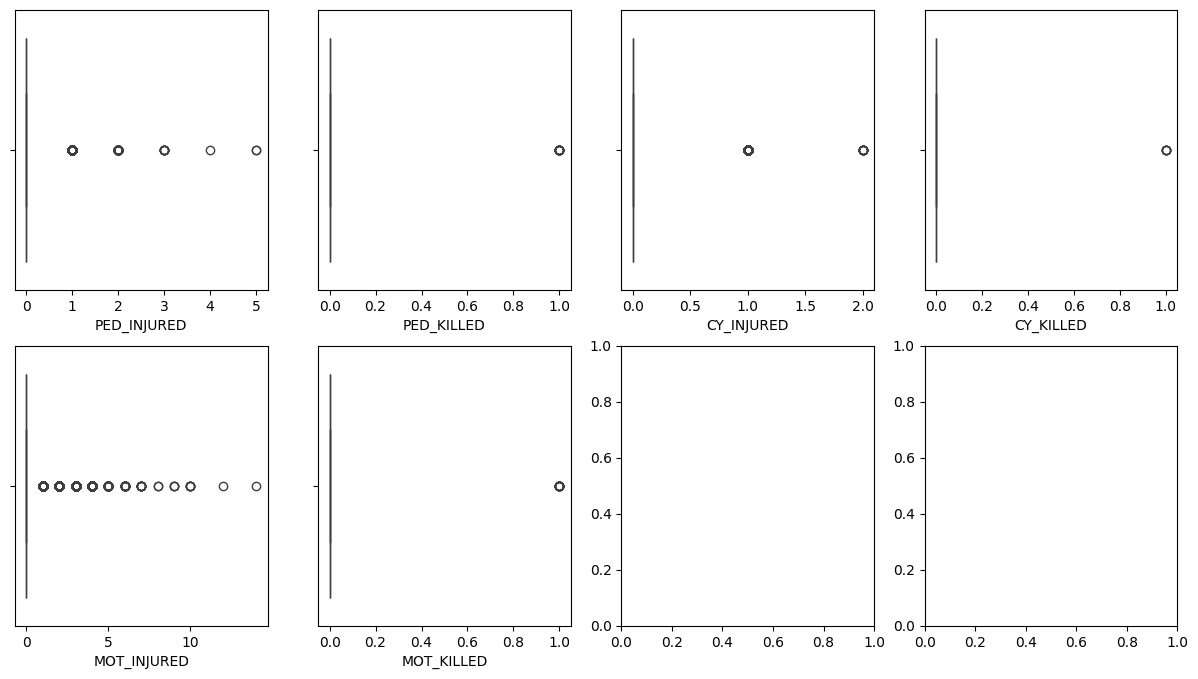

In [18]:
numerical_columns = df_filtered.select_dtypes(include='number').columns.tolist()

img, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_filtered[column], ax=axs[i//4, i%4])

plt.show()

#### Filling missing values with their mode and mean for categorical and numerical values respectively

In [19]:
# filling all categorical missing values with their mode
categorical_columns = df_filtered.select_dtypes(include='object').columns.tolist()

for column in categorical_columns:
    df_filtered[column] = df_filtered[column].str.strip()
    df_filtered.fillna({column: df_filtered[column].mode()[0]}, inplace=True)

# filling numberical missing values with its mean
numerical_columns = df_filtered.select_dtypes(include='number').columns.tolist()

for column in numerical_columns:
    df_filtered.fillna({column: df_filtered[column].mean()}, inplace=True)


In [20]:
df_filtered.isnull().sum()

DATE            0
TIME            0
BOROUGH         0
ON_STREET       0
CROSS_STREET    0
PED_INJURED     0
PED_KILLED      0
CY_INJURED      0
CY_KILLED       0
MOT_INJURED     0
MOT_KILLED      0
FACTOR          0
VEHICLE         0
dtype: int64

### Parsing categorical colums to numeric representation

Based on that most of the categorical columns have many categories One-Hot enconding is not suitable therefore Label Encoding would be a better solution

In [21]:
df_filtered.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
CROSS_STREET    object
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
# creating a label encoder
label_encoder = LabelEncoder()
# categorical columns that have to be encoded
categorical_columns = df_filtered[['BOROUGH', 'ON_STREET', 'CROSS_STREET', 'FACTOR', 'VEHICLE']].columns.tolist()
# encoding categorical columns
for column in categorical_columns:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])


Creating new column with month and time instead of date and time

In [23]:
# taking only month and time in hours from the 'DATE' and 'TIME' columns
df_filtered['MONTH'] = df_filtered['DATE'].apply(lambda x: int(x.split('/')[0]))
df_filtered['TIME'] = df_filtered['TIME'].apply(lambda x: float(x.replace(':', '.')))

df_filtered.drop('DATE', axis=1, inplace=True)


In [24]:
df_filtered[['MONTH', 'TIME']].head()

,MONTH,TIME
COLLISION_ID,,
4056463,1,8.40
3500146,8,21.30
4494395,1,18.53
3824856,1,17.00
4190857,8,23.50


## Training and model selection

### Data spliting and target variable balancing using SMOTE

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df_filtered.drop('VEHICLE', axis=1)
y = df_filtered['VEHICLE']

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

X = preprocessing.scale(X)

splits = [20, 25]
scores = { 'kscores': [], 'dscores': [] }

for split in splits:
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20)

    kmodel = KNeighborsClassifier()
    dmodel = DecisionTreeClassifier()

    kscore = cross_val_score(kmodel, X_train, y_train, cv=5, scoring='accuracy').mean()
    dscore = cross_val_score(dmodel, X_train, y_train, cv=5, scoring='accuracy').mean()

    scores['kscores'].append(kscore)
    scores['dscores'].append(dscore)

d_max_score = np.max([score for score in scores['dscores']])
d_max_split = splits[np.argmax([score for score in scores['dscores']])]

print(f"DTC max score: {d_max_score}")
print(f"DTC max split: {d_max_split}")

k_max_score = np.max([score for score in scores['kscores']])
k_max_split = splits[np.argmax([score for score in scores['kscores']])]

print(f"KNN max score: {k_max_score}")
print(f"KNN max split: {k_max_split}")

DTC max score: 0.2515836171734386
DTC max split: 25
KNN max score: 0.27076226324263564
KNN max split: 25



Finding the best hyperprameters for DecisionTreeClassifier

In [28]:
from sklearn.model_selection import GridSearchCV

# applying the best testing split founded above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=d_max_split)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
d_best_params = grid_search_dt.best_params_
best_score = grid_search_dt.best_score_

print("Best hyper parameter: ", d_best_params)
print("Best score:", best_score)


Best hyper parameter:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.34920995856898235


Finding the best hyperparamenters for KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# applying the best split founded in above cell
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k_max_split)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
k_best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", k_best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.2842627447258214


Showing the testing accuracy and plotting it on a confusion matrix

In [34]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(**k_best_params)
dt = DecisionTreeClassifier(**d_best_params)

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

k_y_pred = knn.predict(X_test)
d_y_pred = dt.predict(X_test)

k_acc = accuracy_score(y_test, k_y_pred)
d_acc = accuracy_score(y_test, d_y_pred)

print(f"KNN test score: {k_acc}\nDTC test score: {d_acc}")


KNN test score: 0.36
DTC test score: 0.32


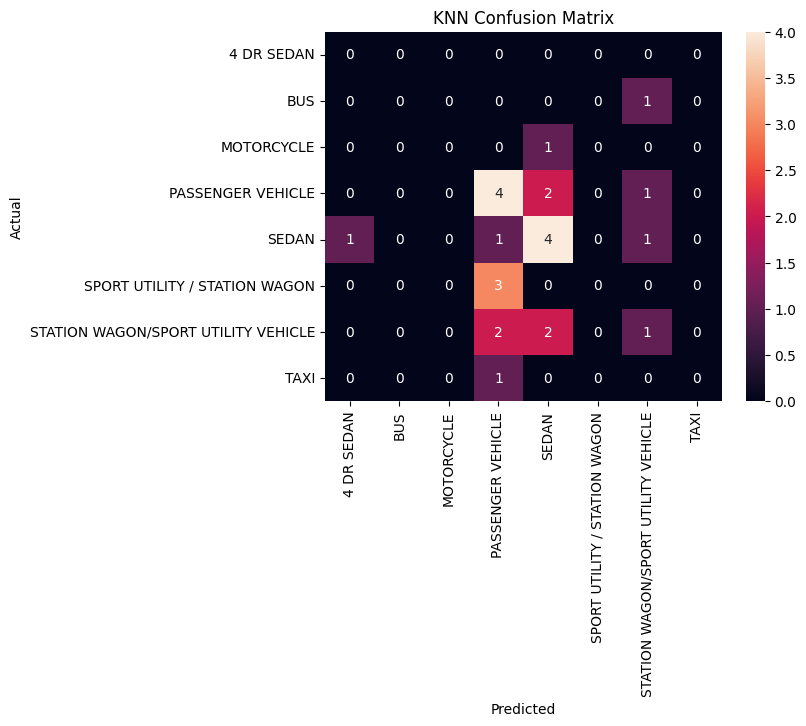

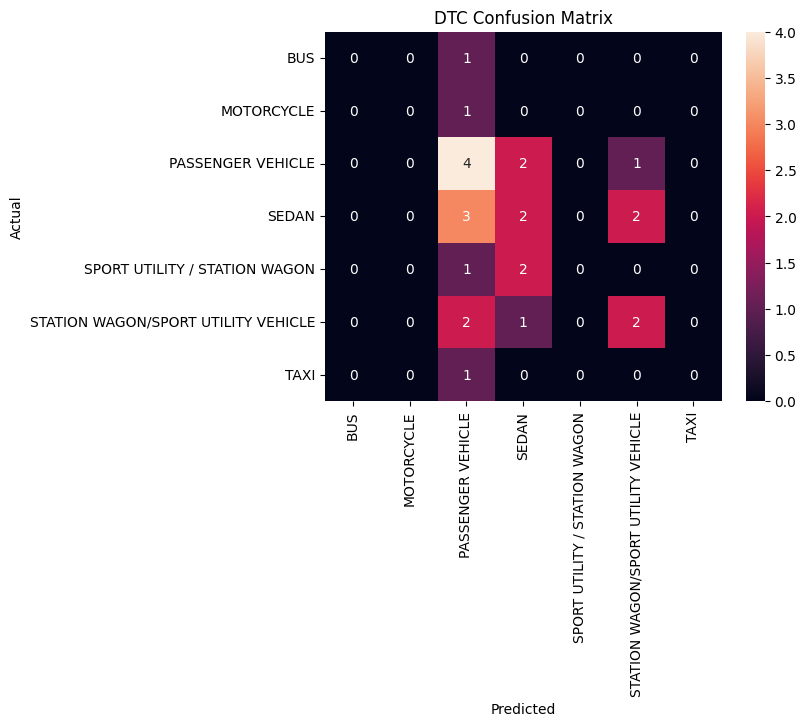

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

kcm = confusion_matrix(y_test, k_y_pred)
dcm = confusion_matrix(y_test, d_y_pred)

kreport = classification_report(y_test, k_y_pred, output_dict=True)
dreport = classification_report(y_test, d_y_pred, output_dict=True)

kenlabels = [int(label) for label in list(kreport.keys()) if label.isdigit()]
labels = label_encoder.inverse_transform(kenlabels)

sns.heatmap(kcm, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

denlabels = [int(label) for label in list(dreport.keys()) if label.isdigit()]
labels = label_encoder.inverse_transform(denlabels)

sns.heatmap(dcm, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
plt.title('DTC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## References

- https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
- https://www.linkedin.com/pulse/title-label-encoding-one-hot-data-preprocessing-shivani-singh
- https://www.linkedin.com/pulse/top-6-machine-learning-algorithms-classification-jagrat-patel/